In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers, datasets
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape , y_test.shape)

#Convert the labels into one-hot codes.
num_classes = 10

#Convert a 28 x 28 image into a 784 x 1 vector.
#x_train = x_train.reshape(-1, 784)
#x_test = x_test.reshape(-1, 784)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test  = x_test.astype('float32')/255


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
model = Sequential() #Create a network sequence.

##Add the first convolutional layer and pooling layer.
model.add(Conv2D(filters=32,kernel_size = (5,5),strides = (1,1), padding = 'same',activation = tf.nn.relu,input_shape=(28, 28, 1) ))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

##Add the second convolutional layer and pooling layer.
model.add(Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

##Add a dropout layer to reduce overfitting.
model.add(Dropout(0.25))
model.add(Flatten())

##Add two fully connected layers.
model.add(Dense(units=128,activation = tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation = tf.nn.softmax))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])


In [6]:
history  = model.fit(x=x_train ,y=y_train ,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0757 - accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0589 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425 - accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0392 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.026

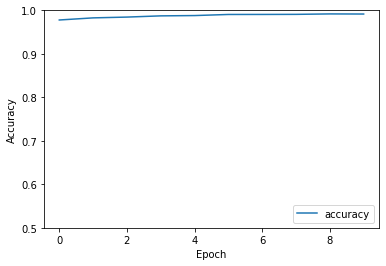

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
test_loss,test_acc=model.evaluate(x=x_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0225 - accuracy: 0.9941
Test Accuracy 0.99
